In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

import pandas as pd
import matplotlib.pyplot as plt

# 1.Custom Dataset

In [6]:
pd.read_csv("cats_and_dogs/cats_dogs.csv")

,Animal,Label
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.2.jpg,0
3,cat.3.jpg,0
4,cat.4.jpg,0
5,cat.5.jpg,0
6,cat.6.jpg,0
7,cat.7.jpg,0
8,dog.0.jpg,1
9,dog.1.jpg,1


In [78]:
class CatsAndDogsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        super().__init__()
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.annotations)
    
    # return a tuple of (image, label)
    def __getitem__(self, index):
        img_path = self.root_dir + self.annotations.iloc[index, 0]
        image = plt.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [77]:
dataset = Dataset()

TypeError: Dataset() takes no arguments

In [79]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(dataset=train_set, batch_size=2, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=2, shuffle=True)

# 2.Augmentation

In [75]:
# executed in order
my_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),

    transforms.ToTensor()
])

dataset = CatsAndDogsDataset(csv_file="cats_and_dogs/cats_dogs.csv", root_dir="cats_and_dogs/cats_dogs_resized/", transform=my_transforms)

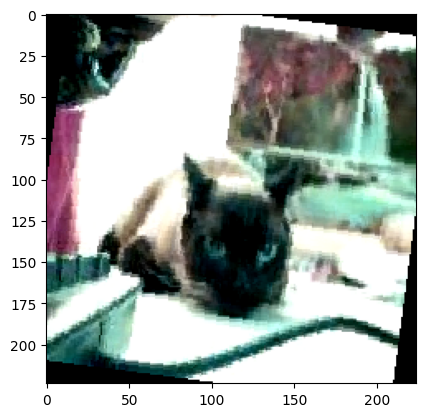

In [76]:
plt.imshow(dataset.__getitem__(5)[0].permute(1, 2, 0))